In [194]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt


In [195]:
data = pd.read_csv('heart.csv')
# data?

In [196]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [197]:
data.info()
# data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [198]:
categorials = data.select_dtypes('object').columns
categorials

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [199]:
integer = data.select_dtypes(['int64', 'float64']).columns
integer

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')

In [200]:
dummy_d = pd.get_dummies(data[categorials], columns=categorials)

In [201]:
data_new = pd.concat([data[integer], dummy_d], axis=1)
data_new

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [202]:
import seaborn as sns

%matplotlib inline 
sns.set_theme(style = "darkgrid")
sns.set_context("paper")
plt.figure(figsize=(8,6))

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

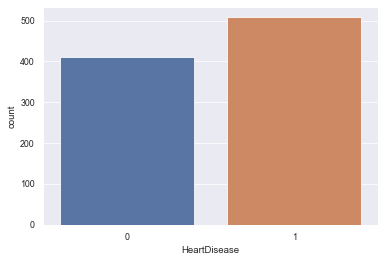

In [203]:
sns.countplot(x = "HeartDisease", data = data_new)
# людей больных болезнью сердца болше, чем здоровых. 

<AxesSubplot:xlabel='Sex_F', ylabel='count'>

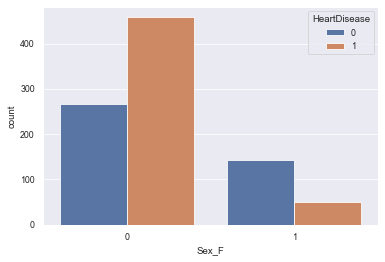

In [204]:
sns.countplot(x = "Sex_F", hue = "HeartDisease", data = data_new)
# мужчины более подвержены болезни сердца, чем женщины

In [205]:
X_train, X_test, y_train, y_test = train_test_split(data_new.drop(columns='HeartDisease'),
                                                    data_new['HeartDisease'],
                                                    test_size=0.2,
                                                    random_state=42)
# X_train.shape, X_test.shape

In [206]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
# clf.predict(X_train)
# clf.predict_proba(X_train)[:5]

DecisionTreeClassifier(max_depth=2, random_state=42)

In [207]:
clf.score(X_train, y_train), clf.score(X_test, y_test)

(0.8337874659400545, 0.842391304347826)

In [208]:
from sklearn.ensemble import RandomForestClassifier

In [209]:
clf_rf = RandomForestClassifier(max_depth=2, random_state=42)
clf_rf.fit(X_train, y_train)
# clf_rf.predict(X_train)
# clf_rf.predict_proba(X_train)[:5]

RandomForestClassifier(max_depth=2, random_state=42)

In [210]:
clf_rf.score(X_train, y_train), clf_rf.score(X_test, y_test)

(0.8583106267029973, 0.8260869565217391)

In [211]:
from sklearn.metrics import classification_report

In [212]:
# для DecisionTreeClassifier:
print(classification_report(y_test, clf.predict(X_test), labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81        77
           1       0.85      0.88      0.87       107

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



In [213]:
# для RandomForestClassifier:
print(classification_report(y_test, clf_rf.predict(X_test), labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79        77
           1       0.86      0.84      0.85       107

    accuracy                           0.83       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



In [214]:
# DecisionTreeClassifier справился лучше....

In [215]:
# Большое значение имеет признак ST_Slope_Up, наименьшее RestingECG_ST.

imp = pd.Series(clf_rf.feature_importances_)

In [216]:
imp.index = pd.Series(X_train.columns)

In [217]:
imp = imp.sort_values(ascending=False)
imp

ST_Slope_Up          0.254541
ExerciseAngina_N     0.145565
ExerciseAngina_Y     0.135770
Oldpeak              0.120220
ST_Slope_Flat        0.103271
ChestPainType_ASY    0.083902
Cholesterol          0.036596
MaxHR                0.033793
Sex_F                0.022403
Age                  0.021668
ChestPainType_ATA    0.013131
FastingBS            0.011620
Sex_M                0.009917
RestingBP            0.003219
ST_Slope_Down        0.003099
ChestPainType_NAP    0.000764
RestingECG_LVH       0.000246
RestingECG_Normal    0.000143
ChestPainType_TA     0.000132
RestingECG_ST        0.000000
dtype: float64

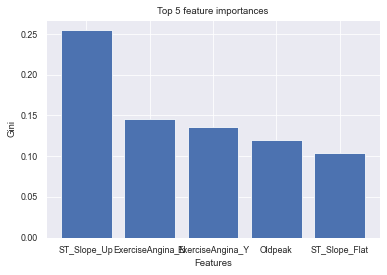

In [218]:
plt.title('Top 5 feature importances')
plt.xlabel('Features')
plt.ylabel('Gini')
plt.bar(imp.head().index, imp.head())
plt.show()

In [219]:
from sklearn.ensemble import BaggingClassifier

In [220]:
clf_bgg = BaggingClassifier(DecisionTreeClassifier(max_depth=2, random_state=42), n_estimators=10, random_state=42)
clf_bgg.fit(X_train, y_train)
# clf_bgg.predict(X_train)
# clf_bgg.predict_proba(X_train)[:5]

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                        random_state=42),
                  random_state=42)

In [221]:
# для BaggingClassifier на DecisionTreeClassifier():
print(classification_report(y_test, clf_bgg.predict(X_test), labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78        77
           1       0.87      0.79      0.82       107

    accuracy                           0.80       184
   macro avg       0.80      0.81      0.80       184
weighted avg       0.81      0.80      0.81       184



In [222]:
# для BaggingClassifier справился хуже, чем DecisionTreeClassifier.

In [223]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC
# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import RidgeCV

In [224]:
estimators = [
    ('dtr', DecisionTreeClassifier(max_depth=2, random_state=42)),
    ('rf', RandomForestClassifier(max_depth=2, random_state=42))]
clf_stc = StackingClassifier(estimators=estimators, final_estimator=LinearSVC(random_state=42))
clf_stc.fit(X_train, y_train)

StackingClassifier(estimators=[('dtr',
                                DecisionTreeClassifier(max_depth=2,
                                                       random_state=42)),
                               ('rf',
                                RandomForestClassifier(max_depth=2,
                                                       random_state=42))],
                   final_estimator=LinearSVC(random_state=42))

In [225]:
# для StackingClassifier:
print(classification_report(y_test, clf_stc.predict(X_test), labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        77
           1       0.87      0.82      0.85       107

    accuracy                           0.83       184
   macro avg       0.82      0.83      0.82       184
weighted avg       0.83      0.83      0.83       184



In [ ]:
# лучший результат показала модель DecisionTreeClassifier.